##### convert to  HSV image space and take each channel and try again
#### need to find a method for optimal threshold value, can treat the outlayers in pixel value and take the avg as threshold and try
#### converting into proper binary makes the code more efficient

In [251]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import pandas as pd
import seaborn as sns
np.set_printoptions(threshold=np.inf) #to get full array set threshold as np.nan or np.inf

In [252]:
def Image_Show(image,title):
    plt.subplot(2,2,1),plt.imshow(image,'gray')
    plt.title(title)
    plt.xticks([]),plt.yticks([])
    plt.show()

In [258]:
def segmented(image):
    
    #dataframe to handle outliers to get a threshold value
    df=pd.DataFrame()
    df['pix']=(np.ravel(image))
    IQR=df['pix'].quantile(.75)-df['pix'].quantile(.15)
    Q1=df['pix'].quantile(.25)-1.5 *IQR
    Q2=df['pix'].quantile(.75)+1.5* IQR
    #converting into a customized binary image with threshold value from above
    threshold=(Q2-Q1)/2
    image[image>threshold]=np.max(image)-1
    image[image<threshold+1]=np.min(image)+1
    #Image_Show(image,'Image_binary')
    #definig the col number for spliting the image with columns not having black color(min value) and asign to splitpoint
    j=-1
    splitpoint=[]
    for i in range(0,image.shape[1]):
        #print(image[:,i])        
        if np.min(image) in image[:,i] :
            if (i-j!=1) :
                splitpoint.append(i)
            j=i    
    #spliting the image  using the list splitpoint
    for k,l in enumerate(splitpoint):
        #print(k,l)
        if l != splitpoint[-1]:
            x= 'Digit',k
            #checking through row wise to remove small patch images and dot
            mincount=0
            for i in range(0,image[:,l:splitpoint[k+1]].shape[0]):
                if np.min(image[:,l:splitpoint[k+1]]) in image[:,l:splitpoint[k+1]][i,:] :
                    mincount+=1
                    ratio=mincount/image.shape[0]
                    #print('ratio',ratio)
            if ratio > 0.6:      #lower this threshold to include the points also, but it may include the noisy pict also   
                Image_Show(image[:,l:splitpoint[k+1]],x)
            #print(image[:,l:splitpoint[k+1]].shape[1])
            #print(l,' L val ', splitpoint[k+1], ' k+1')
            print(ratio)
        else:
            print(l,'else loop')
            x='Digit', k
            Image_Show(image[:,l:],x)        

##### Reading the Image

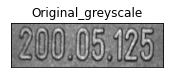

In [283]:
#reading the image
image = cv2.imread('train.png',0)
Image_Show(image,'Original_greyscale')

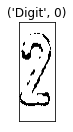

0.74


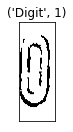

0.73


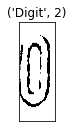

0.73
0.14


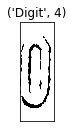

0.72


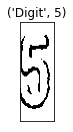

0.75
0.15


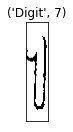

0.75


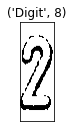

0.76
286 else loop


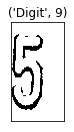

In [284]:
segmented(image)

#### Using HSV

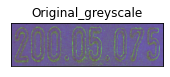

In [78]:
img = cv2.imread('crjt839.png',1)
#grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #to grayscale
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #to HSV
Image_Show(image_hsv,'Original_greyscale')

In [72]:
h,s,v = cv2.split(image_hsv)
#img = cv2.merge((b,g,r))

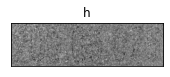

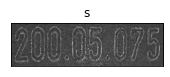

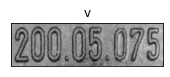

(None, None, None)

In [73]:
Image_Show(h,'h'),Image_Show(s,'s'),Image_Show(v,'v')

In [75]:
image=s

In [69]:
df['pix'].max(),df['pix'].min()

(213, 1)

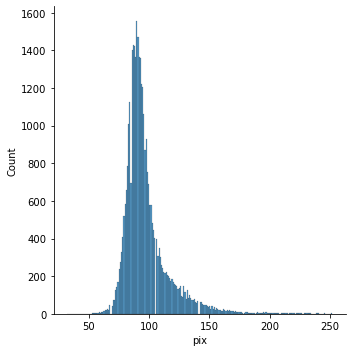

In [76]:
df=pd.DataFrame(np.ravel(image),columns=['pix'])
sns.displot(df['pix'])

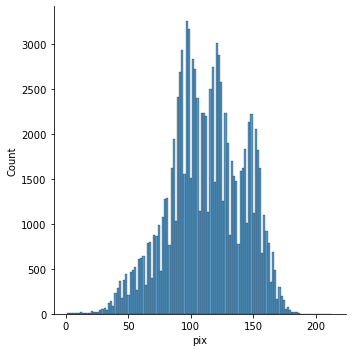

In [68]:
df=pd.DataFrame(np.ravel(image),columns=['pix'])
sns.displot(df['pix'])

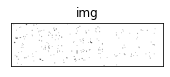

In [49]:

#print(np.min(image),np.max(image))
threshod=95
image[image>threshold]=np.max(image)
image[image<threshold+1]=np.min(image)
Image_Show(image,'img')

In [67]:
filt1=df['pix'] < df['pix'].quantile(.15)
filt2=df['pix']>df['pix'].quantile(.85)
df['pix'].loc[filt1]== df['pix'].quantile(.15)
df['pix'].loc[filt2]== df['pix'].quantile(.85)
image=df['pix'].to_numpy().reshape[image[0],image[1]]

array([157, 127, 107, 152, 123,  98, 150, 121,  97, 158, 128, 107, 147,
       115,  95, 145, 118,  95, 145, 115,  95, 149, 119, 100, 157, 127,
       105, 158, 127,  99, 155, 126,  99, 148, 121, 100, 145, 117,  93,
       145, 120,  94, 152, 127, 107, 155, 128, 104, 156, 127, 107, 151,
       119,  96, 145, 114,  89, 149, 123,  97, 161, 131, 109, 159, 127,
       109, 163, 133, 111, 158, 127,  97, 149, 117,  89, 150, 124,  98,
       154, 125,  95, 154, 121,  93, 149, 120,  98, 151, 123, 104, 154,
       126, 107, 160, 133, 111, 159, 131, 103, 154, 127,  98, 152, 125,
        99, 150, 119,  96, 151, 121, 101, 156, 131, 106, 164, 139, 115,
       161, 132, 111, 152, 123,  97, 153, 125,  94, 155, 125,  98, 156,
       126, 103, 158, 128, 105, 161, 128, 107, 160, 126, 103, 158, 124,
       100, 153, 119,  96, 150, 121,  97, 150, 126, 103, 151, 120, 104,
       151, 121,  99, 150, 124, 103, 152, 122, 103, 150, 120,  95, 145,
       119,  86, 149, 123,  95, 152, 126,  99, 148, 118,  94, 15

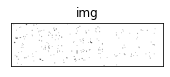

In [49]:
threshold=
image[image>threshold]=np.max(image)
image[image<threshold+1]=np.min(image)
Image_Show(image,'img')

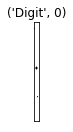

5
6  L val  11  k+1


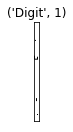

5
11  L val  16  k+1


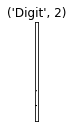

3
16  L val  19  k+1


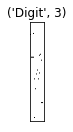

14
19  L val  33  k+1


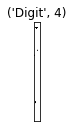

6
33  L val  39  k+1


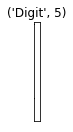

6
39  L val  45  k+1


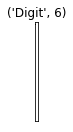

3
45  L val  48  k+1


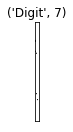

4
48  L val  52  k+1


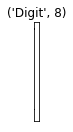

5
52  L val  57  k+1


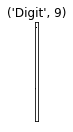

3
57  L val  60  k+1


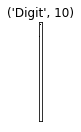

3
60  L val  63  k+1


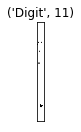

7
63  L val  70  k+1


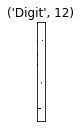

8
70  L val  78  k+1


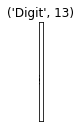

4
78  L val  82  k+1


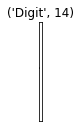

3
82  L val  85  k+1


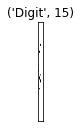

5
85  L val  90  k+1


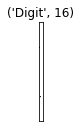

4
90  L val  94  k+1


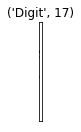

3
94  L val  97  k+1


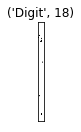

6
97  L val  103  k+1


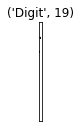

3
103  L val  106  k+1


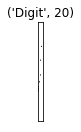

5
106  L val  111  k+1


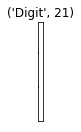

5
111  L val  116  k+1


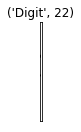

2
116  L val  118  k+1


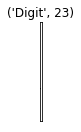

2
118  L val  120  k+1


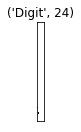

7
120  L val  127  k+1


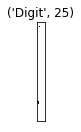

8
127  L val  135  k+1


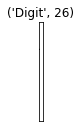

4
135  L val  139  k+1


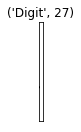

4
139  L val  143  k+1


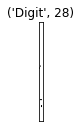

4
143  L val  147  k+1


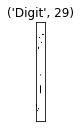

9
147  L val  156  k+1


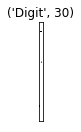

4
156  L val  160  k+1


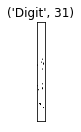

8
160  L val  168  k+1


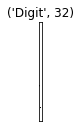

3
168  L val  171  k+1


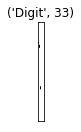

6
171  L val  177  k+1


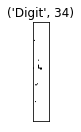

16
177  L val  193  k+1


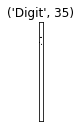

4
193  L val  197  k+1


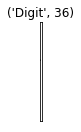

2
197  L val  199  k+1


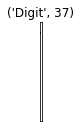

2
199  L val  201  k+1


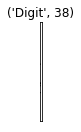

2
201  L val  203  k+1


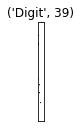

6
203  L val  209  k+1


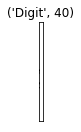

4
209  L val  213  k+1


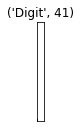

7
213  L val  220  k+1


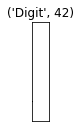

17
220  L val  237  k+1


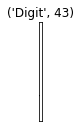

3
237  L val  240  k+1


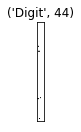

7
240  L val  247  k+1


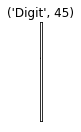

2
247  L val  249  k+1


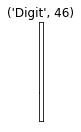

4
249  L val  253  k+1


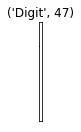

3
253  L val  256  k+1


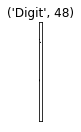

3
256  L val  259  k+1


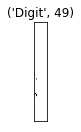

13
259  L val  272  k+1


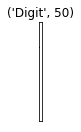

3
272  L val  275  k+1


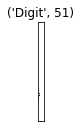

6
275  L val  281  k+1


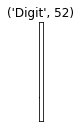

4
281  L val  285  k+1


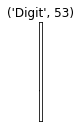

3
285  L val  288  k+1


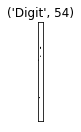

5
288  L val  293  k+1


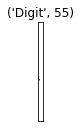

5
293  L val  298  k+1


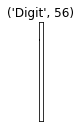

4
298  L val  302  k+1


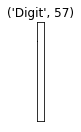

7
302  L val  309  k+1


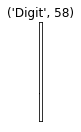

3
309  L val  312  k+1


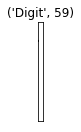

5
312  L val  317  k+1


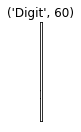

2
317  L val  319  k+1


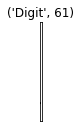

2
319  L val  321  k+1


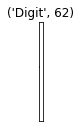

4
321  L val  325  k+1


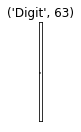

3
325  L val  328  k+1
328 else loop


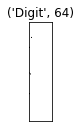

In [48]:
threshold=
#imagewidth =5
image[image>threshold]=np.max(image)
image[image<threshold+1]=np.min(image)
Image_Show(image,'img')
j=-1
splitpoint=[]
for i in range(0,image.shape[1]):
    #print(image[:,i])        
    if np.min(image) in image[:,i] :
        if (i-j!=1) :
            splitpoint.append(i)
        j=i    
for k,l in enumerate(splitpoint):
    #print(k,l)
    if l != splitpoint[-1]:
        x= 'Digit',k
        Image_Show(image[:,l:splitpoint[k+1]],x)
        print(image[:,l:splitpoint[k+1]].shape[1])
        print(l,' L val ', splitpoint[k+1], ' k+1')
    else:
        print(l,'else loop')
        x='Digit', k
        Image_Show(image[:,l:],x)   

In [ ]:
v